In [1]:
from fluff.TrigFN import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
import scipy.stats as stats
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [2]:
plt.rcParams['text.usetex'] = True

# Moc vs $\mu_2-\mu_1$

In [10]:
dist = {
    'name': 'norm',
    'params': {'loc':0, 'scale': 1}
}

differences = np.linspace(-1, 1, 20)  

calculate_power(dist, delta_1=0.65, delta_2=0.75,
                differences=differences, test_statistic=TFN_statistic,
                sample_size=50,  num_tests=1000, 
                num_permutations=1000)

# Moc vs $\epsilon$

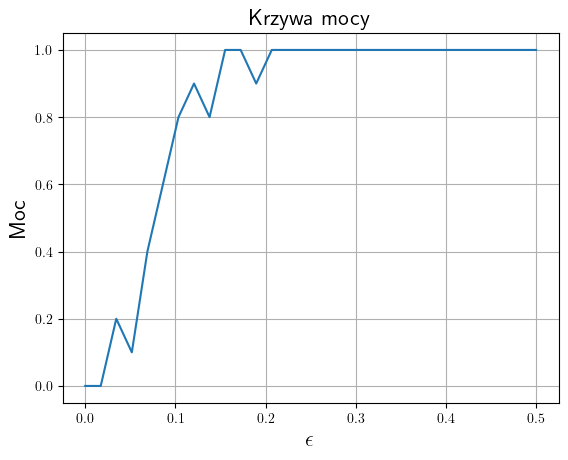

In [ ]:
dist = {
    'name': 'expon',
    'params': {'loc': 0, 'scale': 1}
}

delta_1 = 0.65
delta_2 = 0.75
mixture_proportions = np.linspace(0, 0.5, 30)
shift = 10

calculate_power_eps(dist, delta_1, delta_2, mixture_proportions, shift, TFN_statistic, 
                    sample_size=50,  num_tests=10, num_permutations=10, return_power = False) 

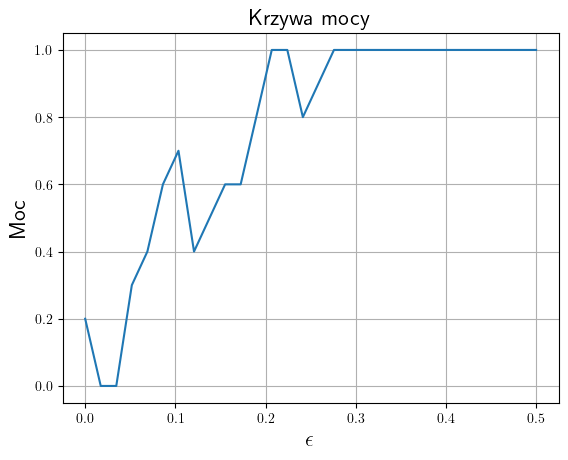

In [ ]:
dist = {
    'name': 'chi2',
    'params': {'df': 3, 'loc': 0}
}

delta_1 = 0.65
delta_2 = 0.75
mixture_proportions = np.linspace(0, 0.5, 30)
shift = 10

calculate_power_eps(dist, delta_1, delta_2, mixture_proportions, shift, TFN_statistic, 
                    sample_size=50,  num_tests=10, num_permutations=10, return_power = False)

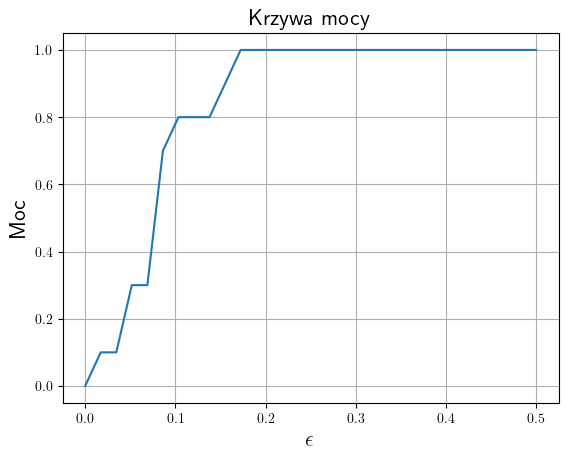

In [ ]:
dist = {
    'name': 't',
    'params': {'df': 5, 'loc': 0}
}

delta_1 = 0.65
delta_2 = 0.75
mixture_proportions = np.linspace(0, 0.5, 30)
shift = 10

calculate_power_eps(dist, delta_1, delta_2, mixture_proportions, shift, TFN_statistic, 
                    sample_size=50,  num_tests=10, num_permutations=10, return_power = False)

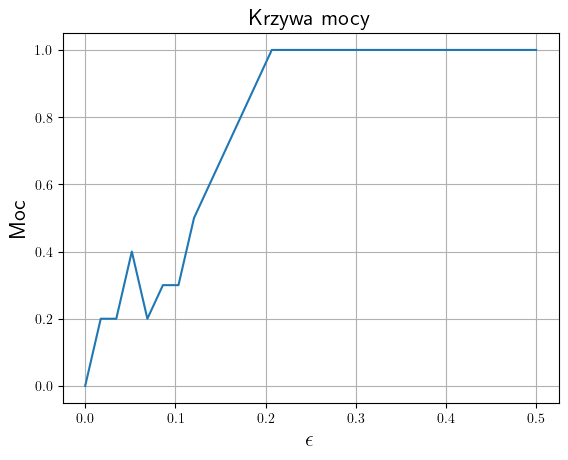

In [ ]:
dist = {
    'name': 'gamma',
    'params': {'a': 5, 'scale': 1, 'loc': 0}
}

delta_1 = 0.65
delta_2 = 0.75  

mixture_proportions = np.linspace(0, 0.5, 30)
shift = 10

calculate_power_eps(dist, delta_1, delta_2, mixture_proportions, shift, TFN_statistic, 
                    sample_size=50,  num_tests=10, num_permutations=10, return_power = False)